In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# CUSTOMERS

In [25]:
customers_df= pd.read_csv("C:\\Users\\admin\\python\\Customers.csv",encoding ="ISO-8859-1")

In [27]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [43]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [29]:
#data_conversion
customers_df["Birthday"] = pd.to_datetime(customers_df['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date


In [31]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [33]:
#checking the missing values
customers_df.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [13]:
#droping missing values
#customers_df.dropna(inplace=True)

In [71]:
#customers_df.isnull().sum()

In [17]:
#dropping columns

customers_df.drop(["State Code","Zip Code"],axis=1,inplace=True)

In [18]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [21]:
#creating column age using datetime

today = datetime.today()
customers_df["Age"] =customers_df["Birthday"].apply(
    lambda x:today.year - x.year-((today.month,today.day)<(x.month,x.day)))

In [23]:
customers_df.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,44
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17,66
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19,58


# visualization 

In [90]:
#customers_df["Name"].count()

15256

In [110]:
#df=customers_df.groupby("CustomerKey")["Country"].count().reset_index()

In [114]:
#df.columns=["CustomerKey","Country"]

In [122]:
# count=customers_df.groupby(["City","State"])["Country"].sum().reset_index()

In [ ]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(20,5))
# sns.barplot(data=count,x="City",y="Country",hue="State")
# plt.title("bar chart")
# plt.show()


In [103]:
customers_df.describe()

,CustomerKey
count,1.525600e+04
mean,1.060708e+06
std,6.128604e+05
min,3.010000e+02
25%,5.134822e+05
50%,1.080114e+06
75%,1.594268e+06
max,2.099937e+06


In [141]:
#df= customers_df["CustomerKey"].count()

In [153]:
#df_1=customers_df["Country"]

In [107]:
#plt.pie(df,df_1,autopct="%1.2f%%")


In [25]:
data=customers_df[["CustomerKey","Country"]].groupby(["Country"]).count()

In [27]:
data

,CustomerKey
Country,
Australia,1420
Canada,1553
France,670
Germany,1473
Italy,635
Netherlands,733
United Kingdom,1944
United States,6828


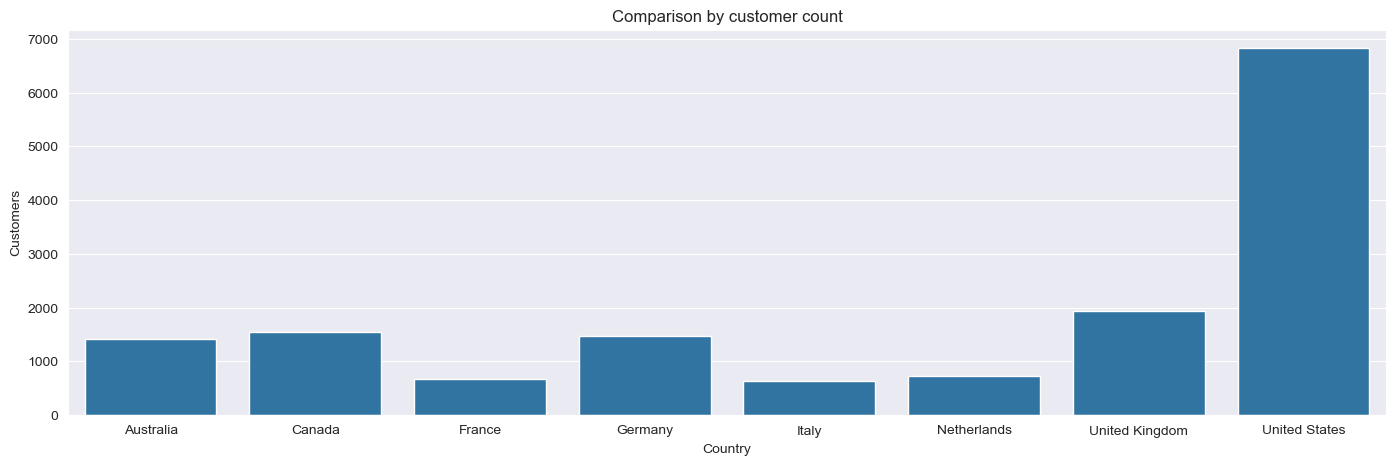

In [29]:
plt.figure(figsize=(17,5))
sns.set_style("darkgrid")
sns.barplot(data=data,x="Country",y="CustomerKey")
plt.ylabel("Customers")
plt.title("Comparison by customer count")
plt.show()

In [35]:
#adding new column to categorize age group

In [31]:
customers_df.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,44
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17,66
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19,58


In [42]:
def age_group(age):
    if age <= 19:
        return "Teenager"
    elif age >= 20 and age<= 35:
        return "Adult"
    elif age >= 36 and age<= 60:
        return "Middle-Age"
    else:
        return "Senior"

customers_df["AgeGroup"] = customers_df["Age"].apply(age_group)


In [44]:
customers_df.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Age,AgeGroup
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,85,Senior
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,44,Middle-Age
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26,77,Senior
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17,66,Senior
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19,58,Middle-Age


In [46]:
age_group=customers_df["AgeGroup"].value_counts()

In [67]:
#piechart based on agegroup

In [ ]:
# plt.figure(figsize=(17,5))
# plt.pie(age_group,labels=customers_df["Country"],autopct="%1.2f%%")
# plt.title("age_group")
# plt.show()

In [50]:
customers_df["Country"].value_counts()

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              635
Name: count, dtype: int64

In [52]:
data_group=customers_df[["AgeGroup","Country","Age"]].groupby(["Country","AgeGroup"]).count()

In [54]:
data_group

Age
Country        AgeGroup        
Australia      Adult        265
               Middle-Age   550
               Senior       605
Canada         Adult        310
               Middle-Age   577
               Senior       666
France         Adult        127
               Middle-Age   238
               Senior       305
Germany        Adult        278
               Middle-Age   577
               Senior       618
Italy          Adult        134
               Middle-Age   243
               Senior       258
Netherlands    Adult        142
               Middle-Age   272
               Senior       319
United Kingdom Adult        416
               Middle-Age   699
               Senior       829
United States  Adult       1403
               Middle-Age  2534
               Senior      2891

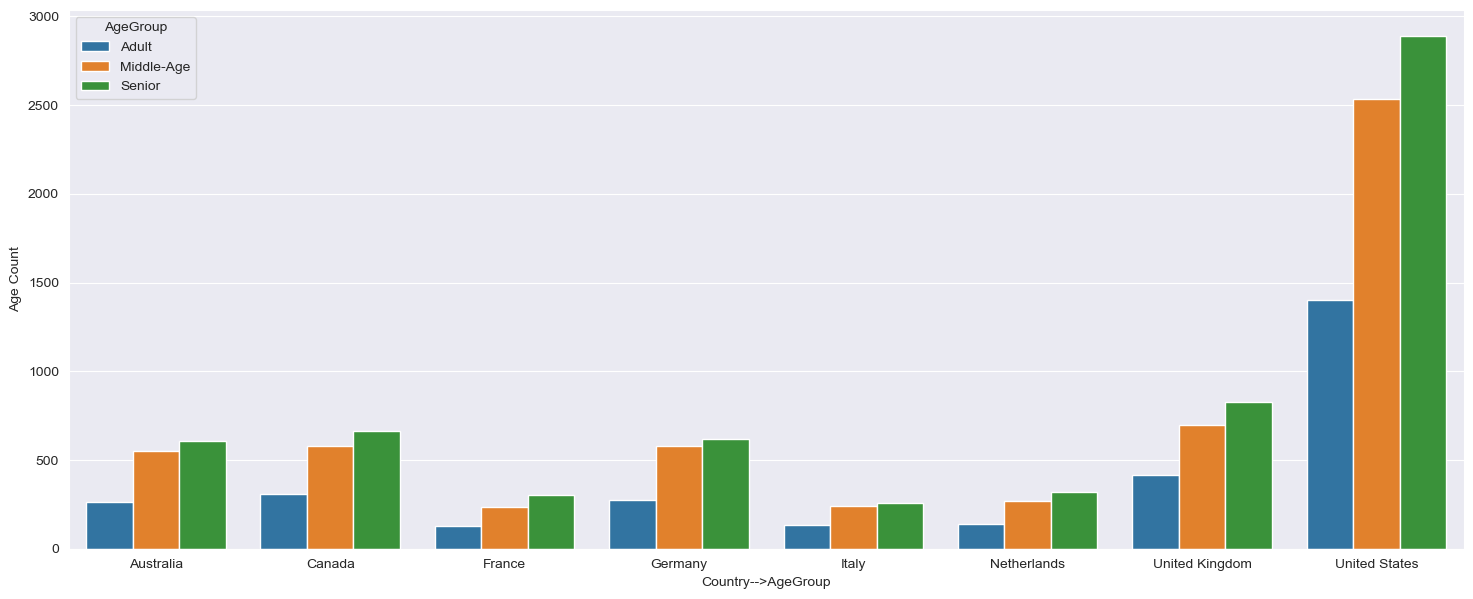

In [72]:
plt.figure(figsize=(18,7))
sns.set_style("darkgrid")
sns.barplot(data=data_group,x="Country",y="Age",hue="AgeGroup")
plt.ylabel("Age Count")
plt.xlabel("Country-->AgeGroup")
plt.show()

# EXCHANGE RATE

In [35]:
exchange_df=pd.read_csv("C:\\Users\\admin\\python\\Exchange_Rates.csv")

In [37]:
exchange_df.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [57]:
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11215 non-null  object 
 1   CurrencyCode  11215 non-null  object 
 2   Exchange      11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [85]:
#renaming the column

In [39]:
exchange_df.rename(columns={"Currency":"CurrencyCode"},inplace=True)

In [41]:
exchange_df.head()

,Date,CurrencyCode,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [93]:
#data conversion

In [43]:
exchange_df["Date"]=pd.to_datetime(exchange_df["Date"], format="%m/%d/%Y", errors='coerce').dt.date

In [45]:
exchange_df.head()

,Date,CurrencyCode,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [47]:
exchange_df["Exchange"] =exchange_df["Exchange"].round(2)

In [49]:
exchange_df.head()

,Date,CurrencyCode,Exchange
0,2015-01-01,USD,1.00
1,2015-01-01,CAD,1.16
2,2015-01-01,AUD,1.22
3,2015-01-01,EUR,0.82
4,2015-01-01,GBP,0.64


In [55]:
#checking missing values
exchange_df.isnull().sum()

Date            0
CurrencyCode    0
Exchange        0
dtype: int64

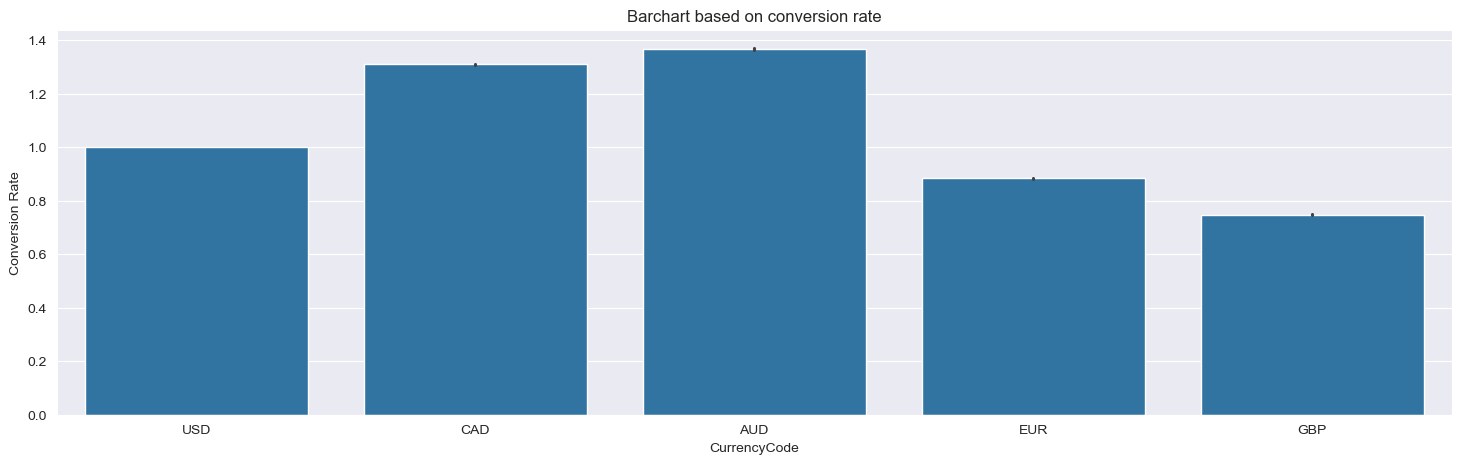

In [163]:
#barchart based on conversion rate

plt.figure(figsize=(18,5))
sns.barplot(data=exchange_df,x="CurrencyCode",y="Exchange")
plt.ylabel("Conversion Rate")
plt.title("Barchart based on conversion rate")
plt.show()

# PRODUCTS

In [61]:
products_df=pd.read_csv("C:\\Users\\admin\\python\\Products.csv")

In [63]:
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [67]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [69]:
#checking for missing values

products_df.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [73]:
#data conversion

products_df["Unit Cost USD"] = products_df["Unit Cost USD"].str.replace("$","").str.replace(",","")

In [79]:
products_df["Unit Cost USD"] =products_df["Unit Cost USD"].astype(float)

In [81]:
products_df["Unit Price USD"] = products_df["Unit Price USD"].str.replace("$","").str.replace(",","")
products_df["Unit Price USD"] =products_df["Unit Price USD"].astype(float)

In [85]:
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [87]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [125]:
#product_details=products_df[["Product Name","Unit Price USD","Brand","Color"]].groupby(["Product Name"]).sum().reset_index()

In [223]:
category=products_df[["Category","CategoryKey"]]

In [241]:
category_details=category.drop_duplicates().reset_index()

In [237]:
category_details


,index,Category,CategoryKey
0,0,Audio,1
1,115,TV and Video,2
2,337,Computers,3
3,943,Cameras and camcorders,4
4,1315,Cell phones,5
5,1570,"Music, Movies and Audio Books",6
6,1660,Games and Toys,7
7,1826,Home Appliances,8


In [247]:
category_details =products_df.groupby("Category").size().reset_index(name="Count")


In [249]:
category_details

,Category,Count
0,Audio,115
1,Cameras and camcorders,372
2,Cell phones,285
3,Computers,606
4,Games and Toys,166
5,Home Appliances,661
6,"Music, Movies and Audio Books",90
7,TV and Video,222


In [251]:
#products_df["CategoryKey"].value_counts()